<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Plot-time-series-for-2D-variables" data-toc-modified-id="Plot-time-series-for-2D-variables-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Plot time series for 2D variables</a></span><ul class="toc-item"><li><span><a href="#Variables-directly-output-by-the-model" data-toc-modified-id="Variables-directly-output-by-the-model-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Variables directly output by the model</a></span></li><li><span><a href="#Secondary-variables" data-toc-modified-id="Secondary-variables-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Secondary variables</a></span></li></ul></li><li><span><a href="#Plot-timeseries-for-3D-variables" data-toc-modified-id="Plot-timeseries-for-3D-variables-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Plot timeseries for 3D variables</a></span></li></ul></div>

In [9]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Plot time series for 2D variables

We plot the time series of each variable in the file. We just plot relevant variables by getting var names from a list saved in this directory ([h1_varnames](h1_varnames)).

## Variables directly output by the model

In [2]:
print("hi")

hi


In [3]:
ds = xr.open_dataset("/home/disk/eos1/bloss/Runs/PIRE/DP-SCREAM/Tests/RCE_SMALL_al/scream_dp_RCE_SMALL_al.eam.h1.2000-01-01-00000.nc")
# list(ds.keys()) # prints a list of data variable names > h1_varnames
ds

<xarray.Dataset>
Dimensions:        (ncol: 11664, lev: 128, ilev: 129, swband: 14, lwband: 16, P3_input_dim: 16, P3_output_dim: 32, time: 338, nbnd: 2)
Coordinates:
  * lev            (lev) float64 2.58 3.23 3.88 4.597 ... 991.0 994.9 998.5
  * ilev           (ilev) float64 2.255 2.905 3.555 4.205 ... 992.9 997.0 1e+03
  * swband         (swband) float64 2.925e+03 3.625e+03 ... 4.4e+04 1.71e+03
  * lwband         (lwband) float64 130.0 375.0 565.0 ... 2.535e+03 2.965e+03
  * P3_input_dim   (P3_input_dim) int32 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16
  * P3_output_dim  (P3_output_dim) int32 1 2 3 4 5 6 7 ... 26 27 28 29 30 31 32
  * time           (time) object 2000-01-01 00:00:00 ... 2000-01-15 01:00:00
Dimensions without coordinates: ncol, nbnd
Data variables: (12/74)
    lat            (ncol) float64 ...
    lon            (ncol) float64 ...
    area           (ncol) float64 ...
    hyam           (lev) float64 ...
    hybm           (lev) float64 ...
    P0             float64 ...
    ...             ...
    TMQ            (time, ncol) float32 ...
    TREFHT         (time, ncol) float32 ...
    TS             (time, ncol) float32 ...
    WINDSPD_10M    (time, ncol) float32 ...
    crm_grid_x     (time, ncol) float32 ...
    crm_grid_y     (time, ncol) float32 ...
Attributes: (12/19)
    ne:                30
    np:                4
    title:             EAM History file information
    source:            E3SM Atmosphere Model
    source_id:         20c5f7518c
    product:           model-output
    ...                ...
    institution_id:    E3SM-Project
    institution:       LLNL (Lawrence Livermore National Laboratory, Livermor...
    contact:           e3sm-data-support@listserv.llnl.gov
    initial_file:      /glade/u/home/pblossey/work/E3SM/inputdata/atm/cam/ini...
    topography_file:   /glade/u/home/pblossey/work/E3SM/inputdata/atm/cam/top...
    time_period_freq:  hour_1

In [10]:
# list of relevant var names modified from 'list(ds.keys())'
varnames = open("h1_varnames","r").read().split("\n")  
len(varnames)

45

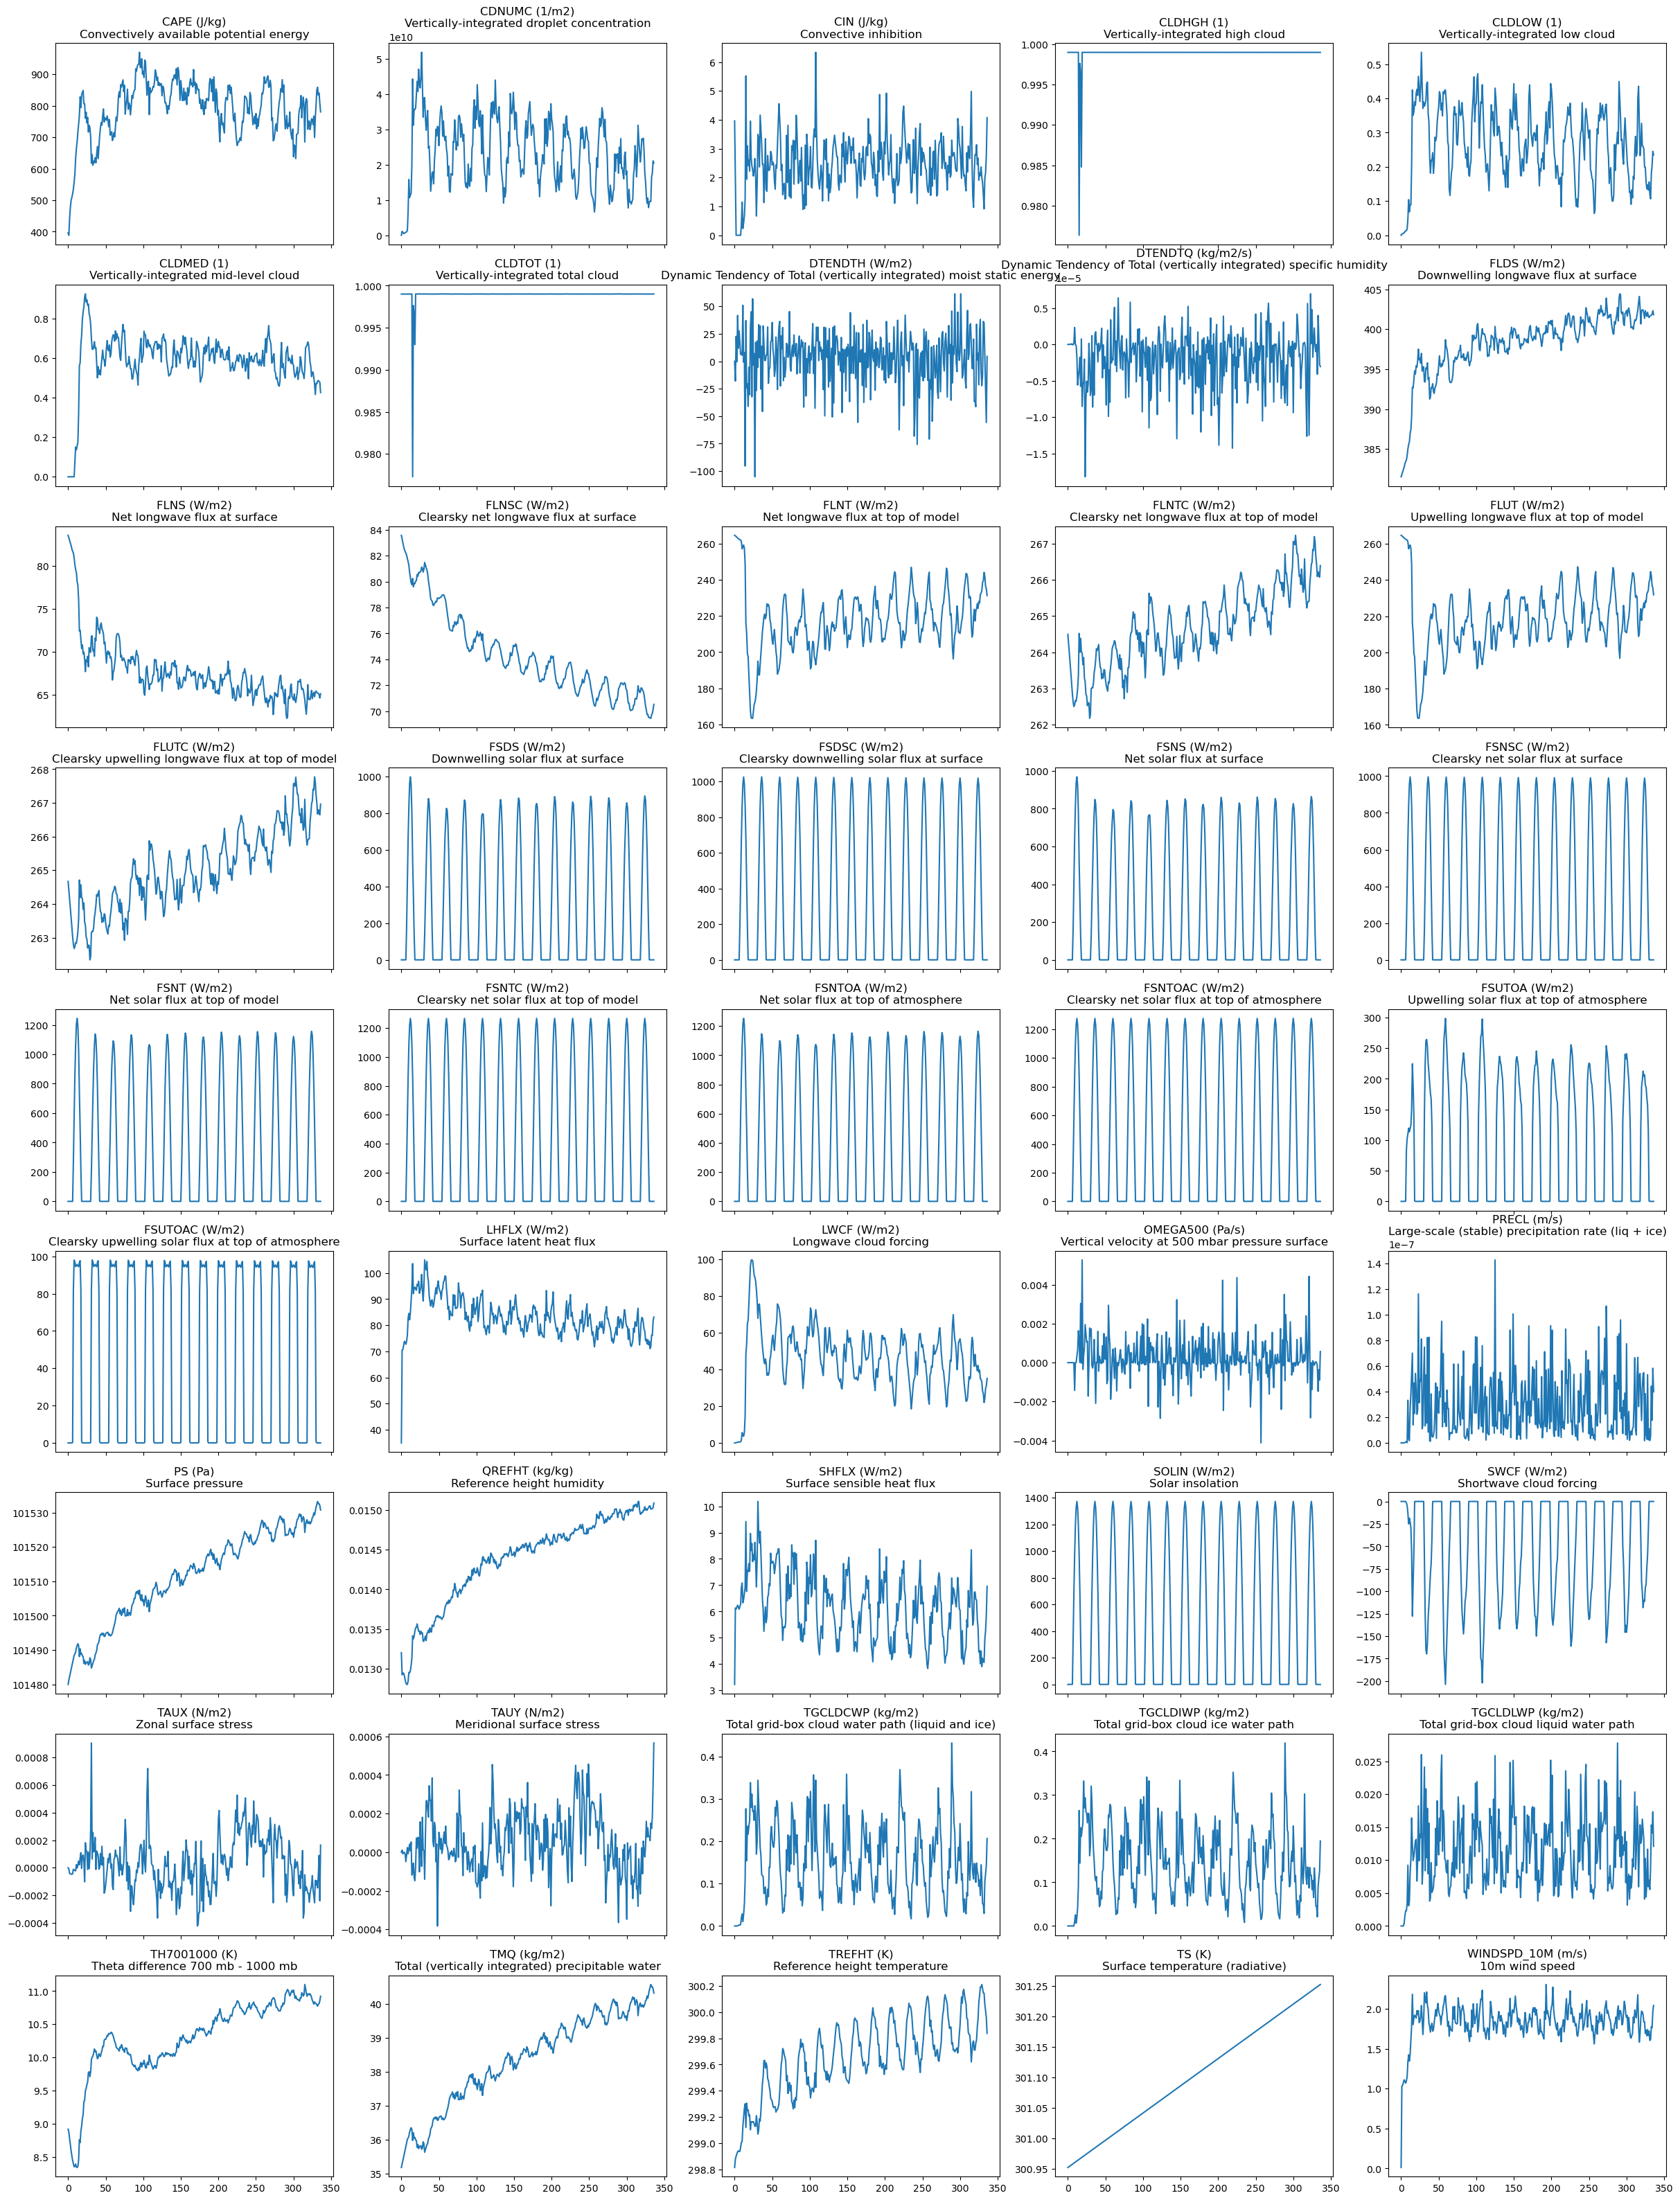

In [37]:
fig, ax = plt.subplots(9,5, figsize=(30,40), sharex=True)
n = 0
for i in range(9):
    for j in range(5):
        var = varnames[n]
        ax[i,j].plot(ds[var].mean(dim=["ncol"]))
        ax[i,j].set_title(var+" ("+str(ds[var].units)+")\n"+str(ds[var].long_name))
        n+=1
plt.savefig("plots/timeseries_h1.png",dpi=140)
plt.show()

## Secondary variables 

- Net downward radiative flux at top of atmosphere: RTOA = FSNTOA-FLUT
- Clearsky version: RTOACLR = FSNTOAC-FLUTC
- Net downward radiative flux at top of the model: RTOM = FSNT-FLNT 
- Net downwards radiative flux at surface: RSFC = FSNS-FLNS
- Clearsky version: RSFCCLR = FSNSC-FLNSC
- Energy input into Ocean = QOCN = RSFC-LHFLX-SHFLX
- Net heating of atmosphere (in W/m2): QATM = RTOM-QOCN
- Precipitation (in W/m2) --- convert from m/s (multiply by latent heat of condensation, Lcond, and density of liquid water, I think)
- Atmospheric cloud radiative effect: ACRE = RTOA-RTOACLR - (RSFC-RSFCCLR) 


In [14]:
# secondary variables (radiation related)
rtoa = ds["FSNTOA"]-ds["FLUT"]
rtoac = ds["FSNTOAC"]-ds["FLUTC"]
rtom = ds["FSNT"]-ds["FLNT"]
rsfc = ds["FSNS"]-ds["FLNS"]
rsfcc = ds["FSNSC"]-ds["FLNSC"]
qocn = rsfc-ds["LHFLX"]-ds["SHFLX"]
qatm = rtom-qocn
acre = rtoa-rtoac-(rsfc-rsfcc)

In [18]:
# daily averages (and average over space)

fsntoa_da = ds["FSNTOA"].groupby(ds.time.dt.day).mean().mean(dim=["ncol"])
flut_da = ds["FLUT"].groupby(ds.time.dt.day).mean().mean(dim=["ncol"])
rtoa_da = rtoa.groupby(ds.time.dt.day).mean().mean(dim=["ncol"])

fsntoac_da = ds["FSNTOAC"].groupby(ds.time.dt.day).mean().mean(dim=["ncol"])
flutc_da = ds["FLUTC"].groupby(ds.time.dt.day).mean().mean(dim=["ncol"])
rtoac_da = rtoac.groupby(ds.time.dt.day).mean().mean(dim=["ncol"])

fsnt_da = ds["FSNT"].groupby(ds.time.dt.day).mean().mean(dim=["ncol"])
flnt_da = ds["FLNT"].groupby(ds.time.dt.day).mean().mean(dim=["ncol"])
rtom_da = rtom.groupby(ds.time.dt.day).mean().mean(dim=["ncol"])

fsns_da = ds["FSNS"].groupby(ds.time.dt.day).mean().mean(dim=["ncol"])
flns_da = ds["FLNS"].groupby(ds.time.dt.day).mean().mean(dim=["ncol"])
rsfc_da = rsfc.groupby(ds.time.dt.day).mean().mean(dim=["ncol"])

fsnsc_da = ds["FSNSC"].groupby(ds.time.dt.day).mean().mean(dim=["ncol"])
flnsc_da = ds["FLNSC"].groupby(ds.time.dt.day).mean().mean(dim=["ncol"])
rsfcc_da = rsfcc.groupby(ds.time.dt.day).mean().mean(dim=["ncol"])

qocn_da = qocn.groupby(ds.time.dt.day).mean().mean(dim=["ncol"])
qatm_da = qatm.groupby(ds.time.dt.day).mean().mean(dim=["ncol"])
acre_da = acre.groupby(ds.time.dt.day).mean().mean(dim=["ncol"])


In [22]:
fsntoa_da

<xarray.DataArray 'FSNTOA' (day: 15)>
array([372.64505, 340.68112, 334.80273, 344.62247, 332.19647, 345.00385,
       347.78452, 345.146  , 348.27246, 344.4995 , 349.45187, 346.5161 ,
       345.18207, 352.8398 ,   0.     ], dtype=float32)
Coordinates:
  * day      (day) int64 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15

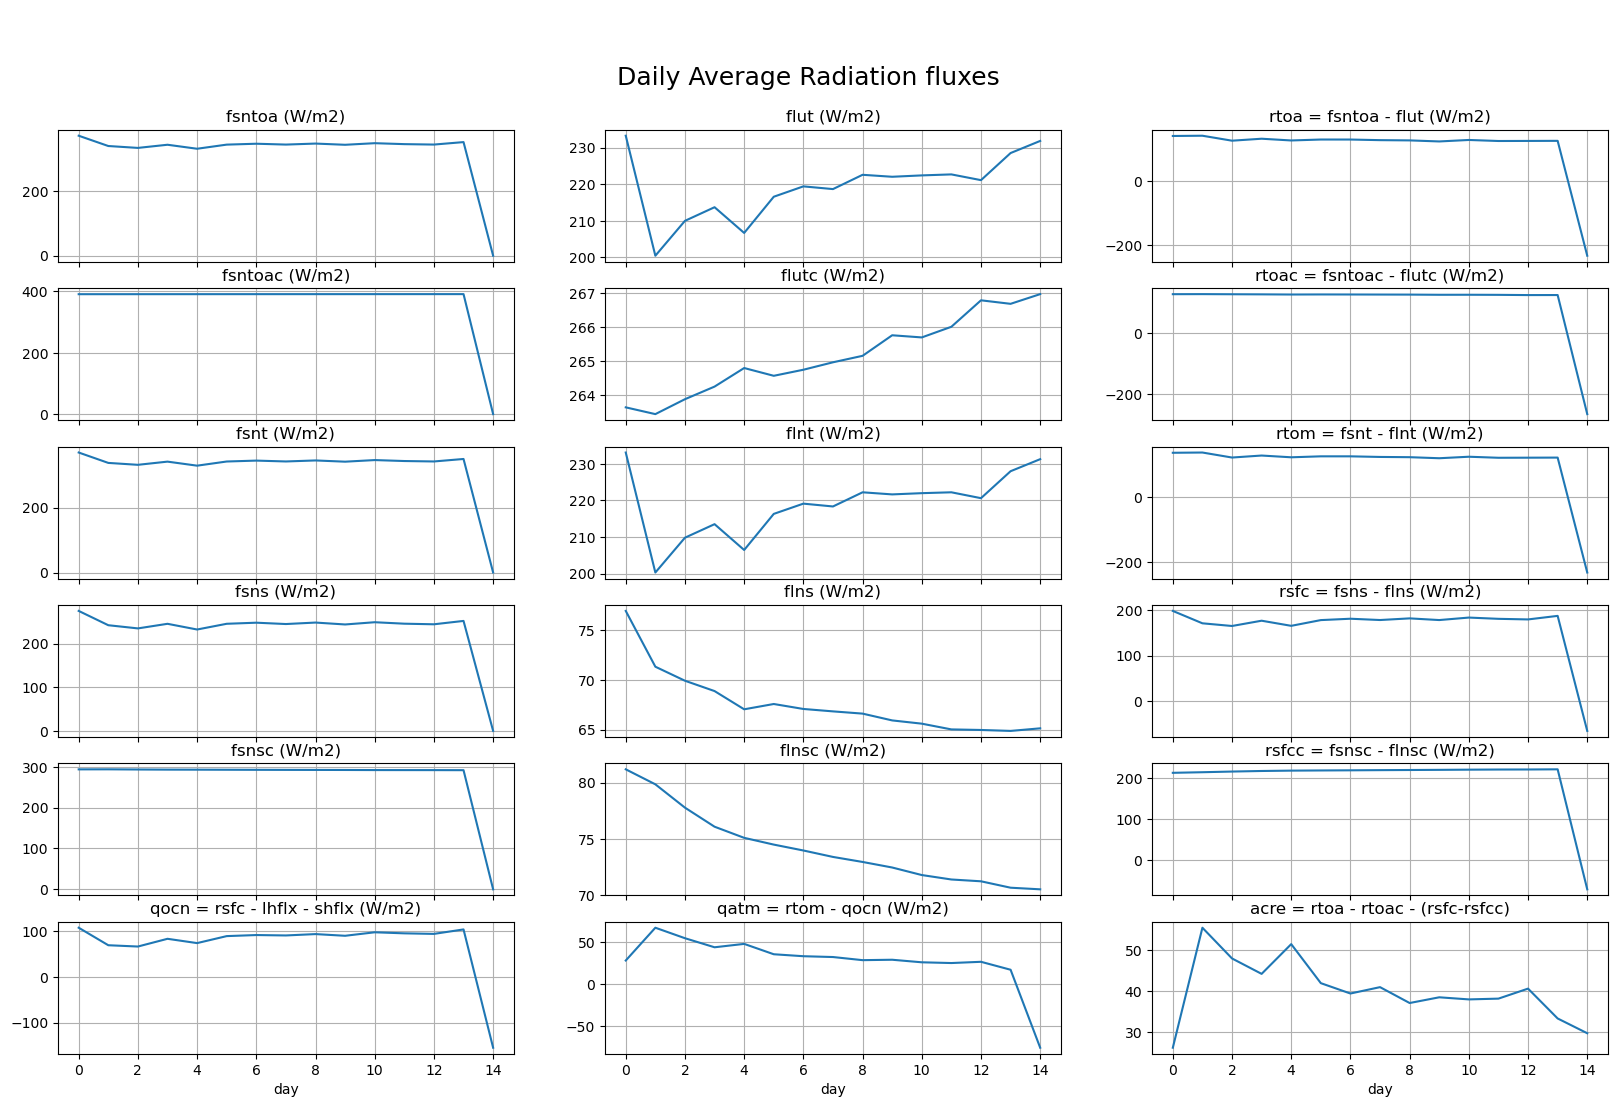

In [36]:
# plot daily averages

fig, ax = plt.subplots(6,3, figsize=(20,12), sharex=True)
day = range(len(fsntoa_da.day))

i=0 # FSNTOA, FLUT, RTOA
ax[i,0].plot(day, fsntoa_da)
ax[i,1].plot(day, flut_da)
ax[i,2].plot(day, rtoa_da)
# title
ax[i,0].set_title("fsntoa (W/m2)")
ax[i,1].set_title("flut (W/m2)")
ax[i,2].set_title("rtoa = fsntoa - flut (W/m2)")

i=1 # FSNTOAC, FLUTC, RTOAC
ax[i,0].plot(day, fsntoac_da)
ax[i,1].plot(day, flutc_da)
ax[i,2].plot(day, rtoac_da)
# title
ax[i,0].set_title("fsntoac (W/m2)")
ax[i,1].set_title("flutc (W/m2)")
ax[i,2].set_title("rtoac = fsntoac - flutc (W/m2)")

i=2 # FSNT, FLNT, RTOM
ax[i,0].plot(day, fsnt_da)
ax[i,1].plot(day, flnt_da)
ax[i,2].plot(day, rtom_da)
# title
ax[i,0].set_title("fsnt (W/m2)")
ax[i,1].set_title("flnt (W/m2)")
ax[i,2].set_title("rtom = fsnt - flnt (W/m2)")

i=3 # FSNS, FLNS, RSFC
ax[i,0].plot(day, fsns_da)
ax[i,1].plot(day, flns_da)
ax[i,2].plot(day, rsfc_da)
# title
ax[i,0].set_title("fsns (W/m2)")
ax[i,1].set_title("flns (W/m2)")
ax[i,2].set_title("rsfc = fsns - flns (W/m2)")

i=4 # FSNSC, FLNSC, RSFCC
ax[i,0].plot(day, fsnsc_da)
ax[i,1].plot(day, flnsc_da)
ax[i,2].plot(day, rsfcc_da)
# title
ax[i,0].set_title("fsnsc (W/m2)")
ax[i,1].set_title("flnsc (W/m2)")
ax[i,2].set_title("rsfcc = fsnsc - flnsc (W/m2)")

i=5 # QOCN, QATM, ACRE
ax[i,0].plot(day, qocn_da)
ax[i,1].plot(day, qatm_da)
ax[i,2].plot(day, acre_da)
# title
ax[i,0].set_title("qocn = rsfc - lhflx - shflx (W/m2)")
ax[i,1].set_title("qatm = rtom - qocn (W/m2)")
ax[i,2].set_title("acre = rtoa - rtoac - (rsfc-rsfcc)")

for i in range(6):
    for j in range(3):
        ax[i,j].grid(True)
        ax[-1,j].set_xlabel("day")
fig.suptitle("\n\nDaily Average Radiation fluxes", fontsize=18)
plt.savefig("plots/timeseries_dailyavg_radiation.png", dpi=140)
plt.show()

# Plot timeseries for 3D variables

In [4]:
ds = xr.open_dataset("/home/disk/eos1/bloss/Runs/PIRE/DP-SCREAM/Tests/RCE_SMALL_al/scream_dp_RCE_SMALL_al.eam.h0.2000-01-01-00000.nc")
ds

<xarray.Dataset>
Dimensions:                 (ncol: 11664, lev: 128, ilev: 129, swband: 14, lwband: 16, P3_input_dim: 16, P3_output_dim: 32, time: 16, nbnd: 2)
Coordinates:
  * lev                     (lev) float64 2.58 3.23 3.88 ... 991.0 994.9 998.5
  * ilev                    (ilev) float64 2.255 2.905 3.555 ... 997.0 1e+03
  * swband                  (swband) float64 2.925e+03 3.625e+03 ... 1.71e+03
  * lwband                  (lwband) float64 130.0 375.0 ... 2.535e+03 2.965e+03
  * P3_input_dim            (P3_input_dim) int32 1 2 3 4 5 6 ... 12 13 14 15 16
  * P3_output_dim           (P3_output_dim) int32 1 2 3 4 5 6 ... 28 29 30 31 32
  * time                    (time) object 2000-01-01 00:00:00 ... 2000-01-16 ...
Dimensions without coordinates: ncol, nbnd
Data variables: (12/167)
    lat                     (ncol) float64 ...
    lon                     (ncol) float64 ...
    area                    (ncol) float64 ...
    hyam                    (lev) float64 ...
    hybm                    (lev) float64 ...
    P0                      float64 ...
    ...                      ...
    crm_grid_x              (time, ncol) float32 ...
    crm_grid_y              (time, ncol) float32 ...
    hstobie_linoz           (time, lev, ncol) float32 ...
    liq_ice_exchange        (time, lev, ncol) float32 ...
    vap_ice_exchange        (time, lev, ncol) float32 ...
    vap_liq_exchange        (time, lev, ncol) float32 ...
Attributes: (12/19)
    ne:                30
    np:                4
    title:             EAM History file information
    source:            E3SM Atmosphere Model
    source_id:         20c5f7518c
    product:           model-output
    ...                ...
    institution_id:    E3SM-Project
    institution:       LLNL (Lawrence Livermore National Laboratory, Livermor...
    contact:           e3sm-data-support@listserv.llnl.gov
    initial_file:      /glade/u/home/pblossey/work/E3SM/inputdata/atm/cam/ini...
    topography_file:   /glade/u/home/pblossey/work/E3SM/inputdata/atm/cam/top...
    time_period_freq:  day_1

In [28]:
# list of relevant var names modified from 'list(ds.keys())'
file="h0_varnames_3Dlev"
varnames = open(file,"r").read().split("\n")  
len(varnames)

50

UW_SEC
VW_SEC
W2_RES
W3
W3_RES
WQW_RES
WQW_SEC
WTHL_RES
WTHL_SEC
WTKE_SEC


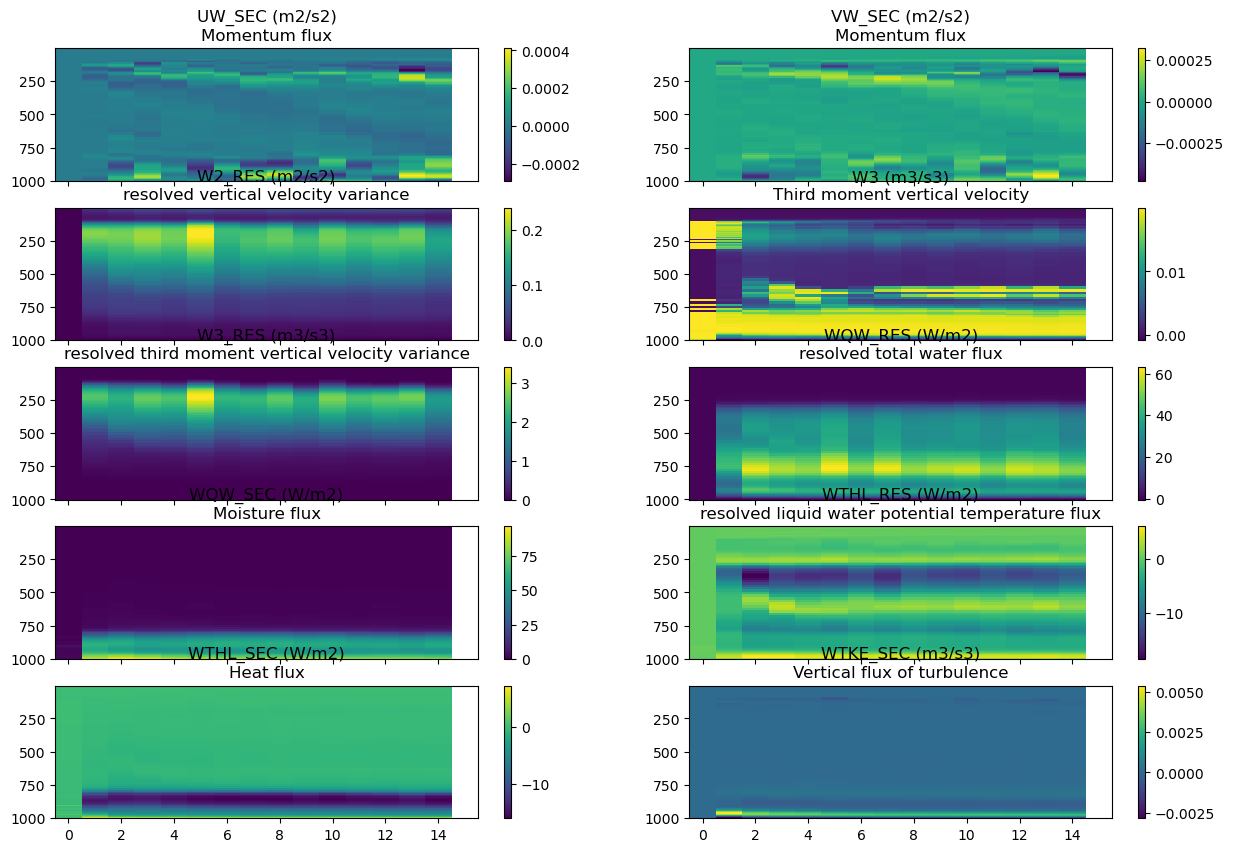

In [26]:
if file=="h0_varnames_2D":
    a,b = 9,7
    fig, ax = plt.subplots(a,b, figsize=(40,45), sharex=True)
    n = 0
    for i in range(a):
        for j in range(b):
            if n<len(varnames):
                var = varnames[n]
                ax[i,j].plot(ds[var].mean(dim=["ncol"]))
                ax[i,j].set_title(var+" ("+str(ds[var].units)+")\n"+str(ds[var].long_name))
                n+=1
            else:
                ax[i,j].axis("off")
    plt.savefig("plots/timeseries_h0_2D.png",dpi=140)
    plt.show()
elif file=="h0_varnames_3Dlev":
    a,b = 10,6
    fig, ax = plt.subplots(a,b, figsize=(40,45), sharex=True)
    n = 0
    for i in range(a):
        for j in range(b):
            if n<len(varnames):
                var = varnames[n]
                print(var)
                pc = ax[i,j].pcolormesh(range(16), ds.lev.values, ds[var].mean(dim=["ncol"]).T)
                ax[i,j].set_title(var+" ("+str(ds[var].units)+")\n"+str(ds[var].long_name))
                ax[i,j].invert_yaxis()
                plt.colorbar(pc, ax=ax[i,j])
                n+=1
            else:
                ax[i,j].axis("off")
    plt.savefig("plots/timeseries_h0_3Dlev.png",dpi=140)
    plt.show()
elif file=="h0_varnames_3Dilev":
    a,b = 5,2
    fig, ax = plt.subplots(a,b, figsize=(15,10), sharex=True)
    n = 0
    for i in range(a):
        for j in range(b):
            if n<len(varnames):
                var = varnames[n]
                print(var)
                pc = ax[i,j].pcolormesh(range(16), ds.ilev.values, ds[var].mean(dim=["ncol"]).T)
                ax[i,j].set_title(var+" ("+str(ds[var].units)+")\n"+str(ds[var].long_name))
                ax[i,j].invert_yaxis()
                plt.colorbar(pc, ax=ax[i,j])
                n+=1
            else:
                ax[i,j].axis("off")
    plt.savefig("plots/timeseries_h0_3Dilev.png",dpi=140)
    plt.show()
else:
    raise Exception("check file name: {}".format(file))


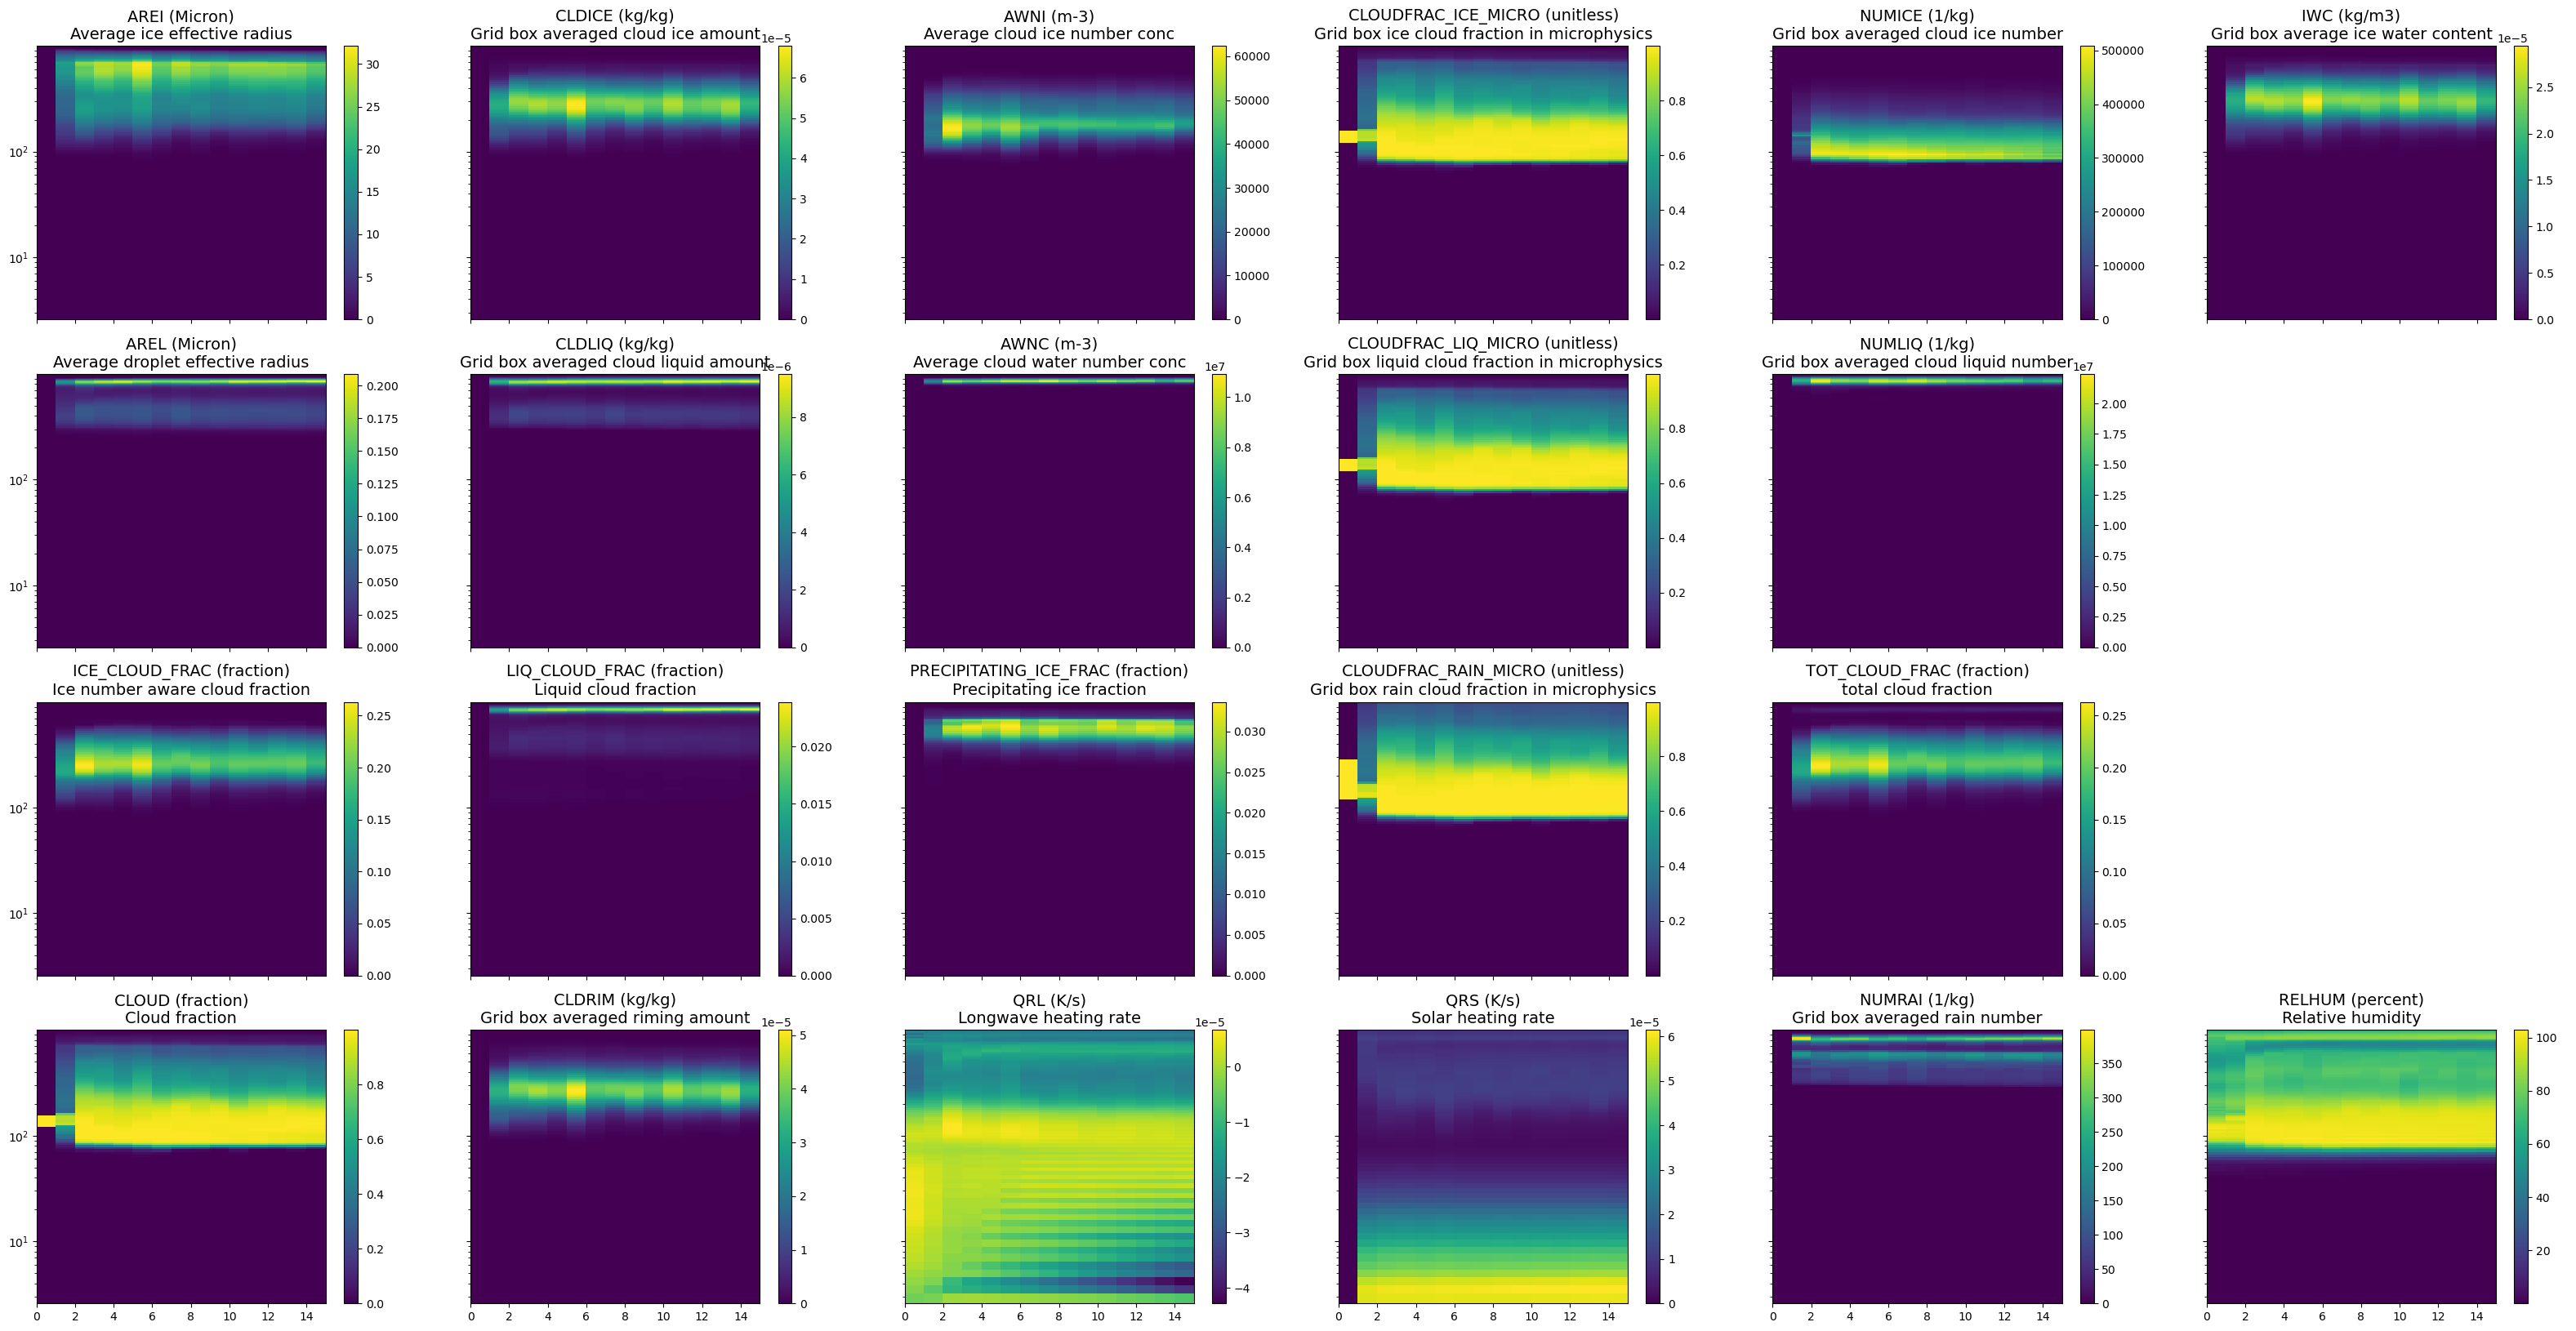

In [24]:
# plot ice and liquid properties
# AREI, CLDICE, AWNI, CLOUDFRAC_ICE_MICRO, NUMICE, IWC
# AREL, CLDLIQ, AWNC, CLOUDFRAC_LIQ_MICRO, NUMLIQ, --
# ICE_CLOUD_FRAC, LIQ_CLOUD_FRAC, PRECIPITATING_ICE_FRAC, CLOUDFRAC_RAIN_MICRO, TOT_CLOUD_FRAC, --
# CLOUD, CLDRIM, QRL, QRS, NUMRAI, RELHUM

fig, ax = plt.subplots(4,6, figsize=(40,20), sharex=True, sharey=True)
days = range(16)

var = np.array(
    [["AREI", "CLDICE", "AWNI", "CLOUDFRAC_ICE_MICRO", "NUMICE", "IWC"],
       ["AREL", "CLDLIQ", "AWNC", "CLOUDFRAC_LIQ_MICRO", "NUMLIQ", None],
       ["ICE_CLOUD_FRAC", "LIQ_CLOUD_FRAC", "PRECIPITATING_ICE_FRAC", 
        "CLOUDFRAC_RAIN_MICRO", "TOT_CLOUD_FRAC", None],
       ["CLOUD", "CLDRIM", "QRL", "QRS", "NUMRAI", "RELHUM"]
      ]
)

for i in range(4):
    for j in range(6):
        if var[i,j] is not None:
            pc = ax[i,j].pcolormesh(days, ds.lev, ds[var[i,j]].mean(dim=["ncol"]).T)
            ax[i,j].axis()
            ax[i,j].invert_yaxis()
            ax[i,j].set_title(var[i,j]+" ("+str(ds[var[i,j]].units)+\
                              ")\n"+str(ds[var[i,j]].long_name), fontsize=14)
            plt.colorbar(pc, ax=ax[i,j])
        else:
            ax[i,j].axis("off")
# ax[0,0].set_yscale("log")
plt.savefig("plots/timeseries_3D_cloud_properties.png", dpi=150)
plt.show()